## ASSIGNMENT-01

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import warnings

from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2

%matplotlib inline  

warnings.filterwarnings("ignore", category=FutureWarning)

### Question 1

**1** Consider the dataset ‘noisy_data.csv’ and apply the following pre-processing techniques and obtain the clean dataset.
– Handling missing values by imputation (10 points)
– Apply Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the
data (10 points)
– Apply encodings for categorical variable and scale the features (10 points)

In [2]:
df=pd.read_csv('/Users/andreapercy/Downloads/noisy_data.csv')

In [3]:
df.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.0,No
1,Brazil,32.0,57600.0,Yes
2,USA,35.0,64800.0,No
3,Brazil,43.0,73200.0,No
4,USA,45.0,NaN,Yes


In [4]:
df.describe()

,Age,Income
count,9.000000,9.000000
mean,43.777778,76533.333333
std,7.693793,14718.695594
min,32.000000,57600.000000
25%,40.000000,64800.000000
50%,43.000000,73200.000000
75%,49.000000,86400.000000
max,55.000000,99600.000000


In [5]:
df.info

<bound method DataFrame.info of    Region   Age   Income Online Shopper
0   India  49.0  86400.0             No
1  Brazil  32.0  57600.0            Yes
2     USA  35.0  64800.0             No
3  Brazil  43.0  73200.0             No
4     USA  45.0      NaN            Yes
5   India  40.0  69600.0            Yes
6  Brazil   NaN  62400.0             No
7   India  53.0  94800.0            Yes
8     USA  55.0  99600.0             No
9   India  42.0  80400.0            Yes>

In [6]:
df.isnull()

,Region,Age,Income,Online Shopper
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [7]:
x = df.iloc[:,:-1].values
print(x)

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]


In [8]:
y = df.iloc[:,:-1].values

In [9]:
print(y)

[['India' 49.0 86400.0]
 ['Brazil' 32.0 57600.0]
 ['USA' 35.0 64800.0]
 ['Brazil' 43.0 73200.0]
 ['USA' 45.0 nan]
 ['India' 40.0 69600.0]
 ['Brazil' nan 62400.0]
 ['India' 53.0 94800.0]
 ['USA' 55.0 99600.0]
 ['India' 42.0 80400.0]]


In [10]:
missing=df.columns[df.isnull().any()].tolist()
print(missing)

['Age', 'Income']


In [11]:
df['Income'].fillna(df['Income'].mean(),inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

**Handling missing values by imputation**

In [12]:
imputer = SimpleImputer(missing_values =np.nan, strategy='mean')

imputer.fit(x[: , 1:3])
            
x[:,1:3] = imputer.transform(x[:,1:3])

In [13]:
x

array([['India', 49.0, 86400.0],
       ['Brazil', 32.0, 57600.0],
       ['USA', 35.0, 64800.0],
       ['Brazil', 43.0, 73200.0],
       ['USA', 45.0, 76533.33333333333],
       ['India', 40.0, 69600.0],
       ['Brazil', 43.77777777777778, 62400.0],
       ['India', 53.0, 94800.0],
       ['USA', 55.0, 99600.0],
       ['India', 42.0, 80400.0]], dtype=object)

In [14]:
df.head()

,Region,Age,Income,Online Shopper
0,India,49.0,86400.000000,No
1,Brazil,32.0,57600.000000,Yes
2,USA,35.0,64800.000000,No
3,Brazil,43.0,73200.000000,No
4,USA,45.0,76533.333333,Yes


**Applying Normality tests to numerical columns and state the hypothesis clearly and comment on the normality of the data** 

In [15]:
data = df['Income']

In [16]:
stat,p_value= shapiro(data)

In [17]:
alpha= 0.05

In [18]:
if p_value > alpha:
    print("The income follows normal distribution")
else:
    print("The income does't follow normal distribution")

The income follows normal distribution


**Applying encoding for categorical variable and scaling the features**

In [19]:
 df['Region'] = df['Region'].replace({'USA':0,'India':1,'Brazil':2})
df.head(10)
df['Online Shopper']=df['Online Shopper'].replace({'Yes':1, 'No':0})
df.head()

,Region,Age,Income,Online Shopper
0,1,49.0,86400.000000,0
1,2,32.0,57600.000000,1
2,0,35.0,64800.000000,0
3,2,43.0,73200.000000,0
4,0,45.0,76533.333333,1


In [20]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(df)

In [21]:
print(scaled_data)

[[0.5        0.73913043 0.68571429 0.        ]
 [1.         0.         0.         1.        ]
 [0.         0.13043478 0.17142857 0.        ]
 [1.         0.47826087 0.37142857 0.        ]
 [0.         0.56521739 0.45079365 1.        ]
 [0.5        0.34782609 0.28571429 1.        ]
 [1.         0.51207729 0.11428571 0.        ]
 [0.5        0.91304348 0.88571429 1.        ]
 [0.         1.         1.         0.        ]
 [0.5        0.43478261 0.54285714 1.        ]]


### Question 2


Consider the text present in the file ‘wiki.txt’ and Answer the following questions :
– Write a program to convert following text into tokens with two tokenization methods such as ‘RegexpTokenizer()’
and ‘word_tokenize()’ from NLTK library. (Note :The tokens should not have stop words and punctuation symbols.
Feel free to decide about the correct list of stop words; e.g., negative words (don’t) could be important for you.
Execute both methods of tokenization along with your code of removing stop words and punctuation.) (10 points)
– Write a regular expression to extract all the year mentions in the ‘wiki.txt’ file. (10 points)
– State the differences observed in the output of tokenization methods. (10 points)

In [22]:
import re
import nltk
from nltk.tokenize import word_tokenize,RegexpTokenizer
from nltk.corpus import stopwords
import string

In [23]:
paragraph = "The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled \"Computing Machinery and Intelligence\" which proposed what is now called the Turing test as a criterion of intelligence.\n\nThe Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.\n\nSome notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted \"blocks worlds\" with restricted vocabularies, and ELIZA, a simulation of a Rogerian psychotherapist, written by Joseph Weizenbaum between 1964 and 1966. Using almost no information about human thought or emotion, ELIZA sometimes provided a startlingly human-like interaction. When the \"patient\" exceeded the very small knowledge base, ELIZA might provide a generic response, for example, responding to \"My head hurts\" with \"Why do you say your head hurts?\"."

In [24]:
print(paragraph)

The history of NLP generally started in the 1950s, although work can be found from earlier periods. In 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence.

The Georgetown experiment in 1954 involved fully automatic translation of more than sixty Russian sentences into English. The authors claimed that within three or five years, machine translation would be a solved problem.[2] However, real progress was much slower, and after the ALPAC report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. Little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.

Some notably successful NLP systems developed in the 1960s were SHRDLU, a natural-language system working in restricted "blocks worlds"

In [25]:
paragraph=paragraph.lower()
paragraph

'the history of nlp generally started in the 1950s, although work can be found from earlier periods. in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence.\n\nthe georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english. the authors claimed that within three or five years, machine translation would be a solved problem.[2] however, real progress was much slower, and after the alpac report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.\n\nsome notably successful nlp systems developed in the 1960s were shrdlu, a natural-language system working in restricted "blocks wo

In [26]:
for i in paragraph:
    paragraph=paragraph.replace("\n",'')
paragraph

'the history of nlp generally started in the 1950s, although work can be found from earlier periods. in 1950, alan turing published an article titled "computing machinery and intelligence" which proposed what is now called the turing test as a criterion of intelligence.the georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english. the authors claimed that within three or five years, machine translation would be a solved problem.[2] however, real progress was much slower, and after the alpac report in 1966, which found that ten-year-long research had failed to fulfill the expectations, funding for machine translation was dramatically reduced. little further research in machine translation was conducted until the late 1980s, when the first statistical machine translation systems were developed.some notably successful nlp systems developed in the 1960s were shrdlu, a natural-language system working in restricted "blocks worlds" wi

In [27]:
tokens = word_tokenize(paragraph)

In [28]:
print(tokens)
count=len(tokens)
print(count)

['the', 'history', 'of', 'nlp', 'generally', 'started', 'in', 'the', '1950s', ',', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', '.', 'in', '1950', ',', 'alan', 'turing', 'published', 'an', 'article', 'titled', '``', 'computing', 'machinery', 'and', 'intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence.the', 'georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'russian', 'sentences', 'into', 'english', '.', 'the', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', ',', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '.', '[', '2', ']', 'however', ',', 'real', 'progress', 'was', 'much', 'slower', ',', 'and', 'after', 'the', 'alpac', 'report', 'in', '1966', ',', 'which', 'found', 'that', 'ten-year-long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectatio

**RegexpTokenizer**

In [29]:
tokenizer = RegexpTokenizer(r'\w+')
tokens1 = tokenizer.tokenize(paragraph)
print(tokens1)
count1=len(tokens1)
print(count1)

['the', 'history', 'of', 'nlp', 'generally', 'started', 'in', 'the', '1950s', 'although', 'work', 'can', 'be', 'found', 'from', 'earlier', 'periods', 'in', '1950', 'alan', 'turing', 'published', 'an', 'article', 'titled', 'computing', 'machinery', 'and', 'intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'the', 'georgetown', 'experiment', 'in', '1954', 'involved', 'fully', 'automatic', 'translation', 'of', 'more', 'than', 'sixty', 'russian', 'sentences', 'into', 'english', 'the', 'authors', 'claimed', 'that', 'within', 'three', 'or', 'five', 'years', 'machine', 'translation', 'would', 'be', 'a', 'solved', 'problem', '2', 'however', 'real', 'progress', 'was', 'much', 'slower', 'and', 'after', 'the', 'alpac', 'report', 'in', '1966', 'which', 'found', 'that', 'ten', 'year', 'long', 'research', 'had', 'failed', 'to', 'fulfill', 'the', 'expectations', 'funding', 'for', 'machine', 'translation', 'was', 'd

In [30]:
stop_words = {"a","the",'an',"in","which","were","of","is","was","or","be","and","to","as","very","as"}

In [31]:
words_with_no_sw=[i for i in tokens1 if i not in stop_words]
words_with_no_sw

['history',
 'nlp',
 'generally',
 'started',
 '1950s',
 'although',
 'work',
 'can',
 'found',
 'from',
 'earlier',
 'periods',
 '1950',
 'alan',
 'turing',
 'published',
 'article',
 'titled',
 'computing',
 'machinery',
 'intelligence',
 'proposed',
 'what',
 'now',
 'called',
 'turing',
 'test',
 'criterion',
 'intelligence',
 'georgetown',
 'experiment',
 '1954',
 'involved',
 'fully',
 'automatic',
 'translation',
 'more',
 'than',
 'sixty',
 'russian',
 'sentences',
 'into',
 'english',
 'authors',
 'claimed',
 'that',
 'within',
 'three',
 'five',
 'years',
 'machine',
 'translation',
 'would',
 'solved',
 'problem',
 '2',
 'however',
 'real',
 'progress',
 'much',
 'slower',
 'after',
 'alpac',
 'report',
 '1966',
 'found',
 'that',
 'ten',
 'year',
 'long',
 'research',
 'had',
 'failed',
 'fulfill',
 'expectations',
 'funding',
 'for',
 'machine',
 'translation',
 'dramatically',
 'reduced',
 'little',
 'further',
 'research',
 'machine',
 'translation',
 'conducted',
 'unti

In [32]:
for punc in string.punctuation:
    paragraph=paragraph.replace(punc,"") 
paragraph

'the history of nlp generally started in the 1950s although work can be found from earlier periods in 1950 alan turing published an article titled computing machinery and intelligence which proposed what is now called the turing test as a criterion of intelligencethe georgetown experiment in 1954 involved fully automatic translation of more than sixty russian sentences into english the authors claimed that within three or five years machine translation would be a solved problem2 however real progress was much slower and after the alpac report in 1966 which found that tenyearlong research had failed to fulfill the expectations funding for machine translation was dramatically reduced little further research in machine translation was conducted until the late 1980s when the first statistical machine translation systems were developedsome notably successful nlp systems developed in the 1960s were shrdlu a naturallanguage system working in restricted blocks worlds with restricted vocabulari

**Expression to extract all the year**

In [33]:
numbers = re.findall(r'\d+', paragraph)
numbers

['1950', '1950', '1954', '2', '1966', '1980', '1960', '1964', '1966']

*Differences observed in the output of tokenization methods*

**The major difference which was found among the two types of tokenization was that in word_tokenize() the punctions were treated as separate tokens while in RegexpTokenizer() the punctuation marks weren't treated as a token.**

### Question 3

 Consider this dataset from kaggle. (Download the dataset from following link : https://www.kaggle.com/dansbecker/
melbourne-housing-snapshot/home) and answer the following questions :
– Apply the feature selection techniques over the melbourne-housing -dataset namely (20 points):
∗ Correlation
∗ Chi-Square
∗ Mutual-Information
∗ Random Forest feature importance
– Compare the importance of selected features using bar chart (10 points).
– Comment on the results obtained from various feature selection techniques and which is the best and worst feature
selection selection technique on the given dataset (10 points).

In [5]:
dataf=pd.read_csv('/Users/andreapercy/Downloads/melb_data.csv')
dataf.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [6]:
todrop = ['Address', 'Type', 'Suburb','Date' 'Method', 'SellerG', 'CouncilArea', 'Lattitude', 'Longtitude','Postcode', 'Regionname']
columns_to_drop = [col for col in todrop if col in dataf.columns]
dataf.drop(columns_to_drop, axis=1, inplace=True)
to_drop = [col for col in todrop if col in dataf.columns]
dataf.drop('Date', axis=1, inplace=True)
dataf.drop('Method', axis=1, inplace=True)

In [7]:
dataf.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,4019.0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,4019.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,4019.0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,4019.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,4019.0


In [8]:
dataf.tail()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
13575,4,1245000.0,16.7,4.0,2.0,2.0,652.0,NaN,1981.0,7392.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.0,1995.0,6380.0
13577,3,1170000.0,6.8,3.0,2.0,4.0,436.0,NaN,1997.0,6380.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.0,1920.0,6380.0
13579,4,1285000.0,6.3,4.0,1.0,1.0,362.0,112.0,1920.0,6543.0


In [9]:
missing_df=dataf.columns[dataf.isnull().any()].tolist()
print(missing_df)

['Car', 'BuildingArea', 'YearBuilt']


In [10]:
dataf['Car'].fillna(dataf['Car'].mean(),inplace=True)

In [11]:
dataf['BuildingArea'].fillna(dataf['BuildingArea'].mean(),inplace=True)

In [12]:
dataf['YearBuilt'].fillna(dataf['YearBuilt'].mean(),inplace=True)

In [13]:
dataf.isnull().sum()

Rooms            0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Propertycount    0
dtype: int64

In [14]:
dataf.head()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,151.96765,1964.684217,4019.0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00000,1900.000000,4019.0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00000,1900.000000,4019.0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,151.96765,1964.684217,4019.0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00000,2014.000000,4019.0


In [15]:
x1 = dataf.iloc[:,:-1].values
print(x1)

[[2.00000000e+00 1.48000000e+06 2.50000000e+00 ... 2.02000000e+02
  1.51967650e+02 1.96468422e+03]
 [2.00000000e+00 1.03500000e+06 2.50000000e+00 ... 1.56000000e+02
  7.90000000e+01 1.90000000e+03]
 [3.00000000e+00 1.46500000e+06 2.50000000e+00 ... 1.34000000e+02
  1.50000000e+02 1.90000000e+03]
 ...
 [3.00000000e+00 1.17000000e+06 6.80000000e+00 ... 4.36000000e+02
  1.51967650e+02 1.99700000e+03]
 [4.00000000e+00 2.50000000e+06 6.80000000e+00 ... 8.66000000e+02
  1.57000000e+02 1.92000000e+03]
 [4.00000000e+00 1.28500000e+06 6.30000000e+00 ... 3.62000000e+02
  1.12000000e+02 1.92000000e+03]]


In [16]:
dataf.tail()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
13575,4,1245000.0,16.7,4.0,2.0,2.0,652.0,151.96765,1981.0,7392.0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,133.00000,1995.0,6380.0
13577,3,1170000.0,6.8,3.0,2.0,4.0,436.0,151.96765,1997.0,6380.0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,157.00000,1920.0,6380.0
13579,4,1285000.0,6.3,4.0,1.0,1.0,362.0,112.00000,1920.0,6543.0


In [17]:
X = dataf.drop('Price', axis=1) 
y = dataf['Price']

**Correlation**

In [18]:
housing_corr= dataf.corr().round(2)
housing_corr

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
Rooms,1.00,0.50,0.29,0.94,0.59,0.41,0.03,0.09,-0.05,-0.08
Price,0.50,1.00,-0.16,0.48,0.47,0.24,0.04,0.07,-0.26,-0.04
Distance,0.29,-0.16,1.00,0.30,0.13,0.26,0.03,0.07,0.19,-0.05
Bedroom2,0.94,0.48,0.30,1.00,0.58,0.40,0.03,0.09,-0.04,-0.08
Bathroom,0.59,0.47,0.13,0.58,1.00,0.32,0.04,0.08,0.12,-0.05
Car,0.41,0.24,0.26,0.40,0.32,1.00,0.03,0.07,0.08,-0.02
Landsize,0.03,0.04,0.03,0.03,0.04,0.03,1.00,0.09,0.01,-0.01
BuildingArea,0.09,0.07,0.07,0.09,0.08,0.07,0.09,1.00,0.00,-0.02
YearBuilt,-0.05,-0.26,0.19,-0.04,0.12,0.08,0.01,0.00,1.00,0.00
Propertycount,-0.08,-0.04,-0.05,-0.08,-0.05,-0.02,-0.01,-0.02,0.00,1.00


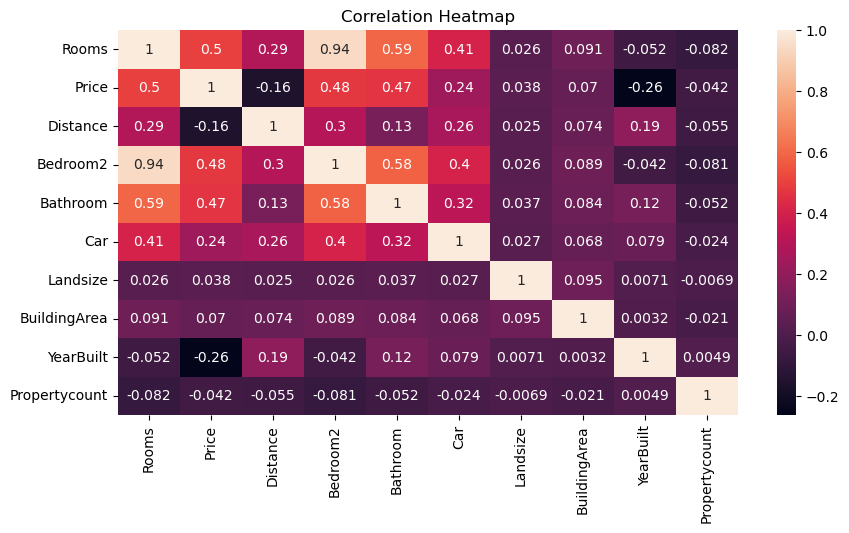

In [19]:
correlation = dataf.corr()
plt.figure(figsize=(10, 5))
sea.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()

**Chi Square**

In [20]:
selector = SelectKBest(score_func=chi2, k=5)
new_data = selector.fit_transform(X, y)

mask = selector.get_support()
best_features = X.columns[mask]
print(best_features)


Index(['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'Propertycount'], dtype='object')


**Mutual Information**

In [21]:
m_info=mutual_info_regression(X, y)

In [22]:
mi_info_df = pd.DataFrame({'Feature': X.columns, 'MI Score': m_info})
print(mi_info_df.round(2))

         Feature  MI Score
0          Rooms      0.22
1       Distance      0.21
2       Bedroom2      0.21
3       Bathroom      0.13
4            Car      0.09
5       Landsize      0.14
6   BuildingArea      0.20
7      YearBuilt      0.11
8  Propertycount      0.21


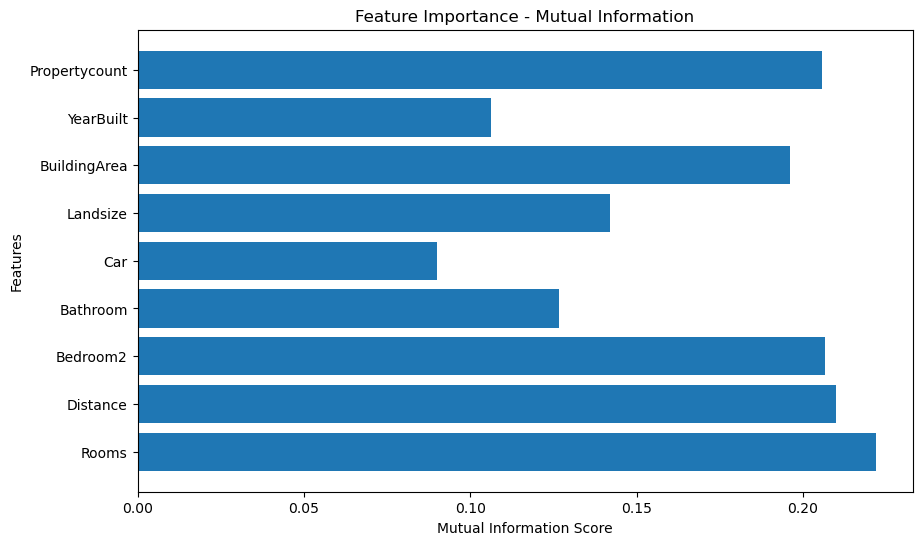

In [23]:
plt.figure(figsize=(10, 6))
plt.barh(mi_info_df['Feature'], mi_info_df['MI Score'])
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Feature Importance - Mutual Information')
plt.show()

**Random Forest Feature Importance**

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
rf_model=RandomForestClassifier()   

In [26]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
dataf.columns

Index(['Rooms', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

In [28]:
feature=['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea', 'YearBuilt', 'Propertycount']

In [29]:
importances = rf_model.feature_importances_
a=0
for i in importances:
    print("Feature:",a,"=",i)
    a+=1

Feature: 0 = 0.022918038020249887
Feature: 1 = 0.1742385579432305
Feature: 2 = 0.02624442005945208
Feature: 3 = 0.03386134281699734
Feature: 4 = 0.07125638879456776
Feature: 5 = 0.2343770978898287
Feature: 6 = 0.1348157230127904
Feature: 7 = 0.12799218702858464
Feature: 8 = 0.1742962444342987


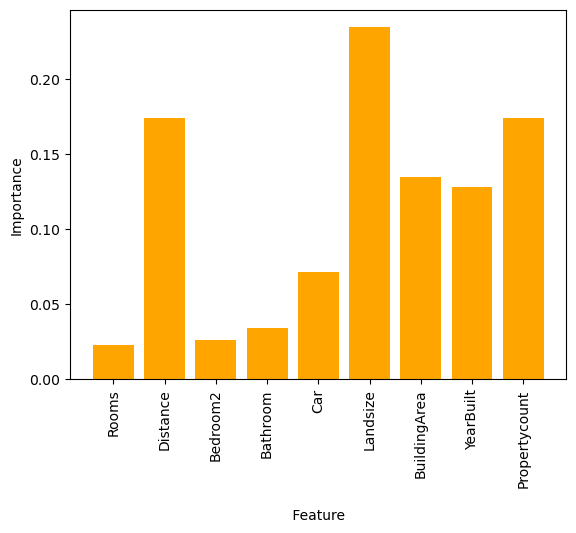

In [30]:
plt.bar(range(len(importances)),importances,color='orange')
plt.xticks(range(len(importances)),feature,rotation='vertical')
plt.xlabel('\n Feature ')
plt.ylabel('Importance')
plt.show()

**The correlation heatmap shows that landsize a positive correaltio with all the other features,Apart from that bedroom and rooms also have a strong positive correlation.According to mutual information, distance,land size,property count,building area seem to be the high contributors . According to the best features in random forest landsize is at the highest value. Out of all the three tests the most prominent feature contributing the price of the house is the landsize. The best feature according to the bar chart is the landsize. Landsize seems to contribute the most to the price of the houses when compared to the other features. And the features which contributes the least are the number of bedrooms,rooms and bathroom. The beat feature selection technique which was found is through Random Forest Classifier and the worst being Mutual Information Technique because it is a little tedious, it is more confusing and less straight forward.** 